# Logistic Regression with Tensorflow

## 1 可视化数据

**Logistic rgression: the hypothesis is the Sigmoid of a straight line**
$$
h(x) = \sigma(\omega x +b)
$$
$$
where \sigma(z) = \frac{1}{1+e^{-z}}
$$


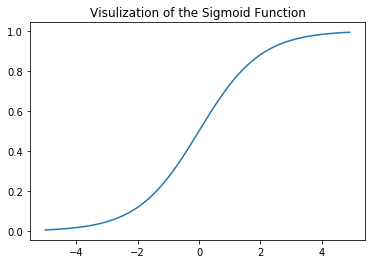

In [2]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot(np.arange(-5,5,0.1),sigmoid(np.arange(-5,5,0.1)))
plt.title("Visulization of the Sigmoid Function")
plt.show()

## 2 导入库,数据集

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [24]:
data = pd.read_csv('Iris.csv',header=0)

In [25]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
data.shape

(150, 6)

**利用pandas中的drop函数可以去掉某一行或者某一些的数据**
* DataFrame.drop()

* data=data.drop('Species',axis=1)

* data.shape

* data.head()

In [23]:
data.iloc[:,1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
data_train = pd.read_csv('dataset.csv',header=None)

In [28]:
data_train.head(10)

,0,1,2,3
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1
5,5,5.4,3.9,1
6,6,4.6,3.4,1
7,7,5.0,3.4,1
8,8,4.4,2.9,1
9,9,4.9,3.1,1


In [29]:
data_train.shape

(100, 4)

**从数据集得到特征矩阵和相应的标签并可视化**

In [59]:
# Feature Matrix
x_orig = data_train.iloc[:,1:-1].values

# Data labels
y_orig = data_train.iloc[:,-1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Labels Vector: ",y_orig.shape)
# y_orig

Shape of Feature Matrix: (100, 2)
Shape Labels Vector:  (100, 1)


## 3 可视化数据集

In [62]:
# Positive Data Points
# x_pos = []
# print(len(x_orig))
# for i in range(len(x_orig)):
#     if y_orig[i]==1:
#         print(i)
#         x_pos.append(x_orig[i])
# x_pos =[x_orig[i] for i in range(len(x_orig)) if y_orig[i]==1]

# Negative Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i]==1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i]==0])



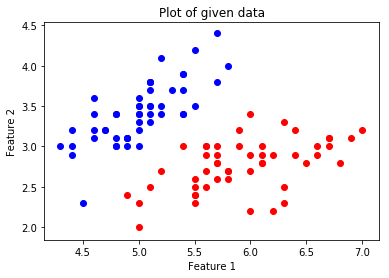

In [63]:
# Ploting the Positive Data Points
plt.scatter(x_pos[:,0],x_pos[:,1],color='blue',label='Positive')

# Ploting the Negative Data Points
plt.scatter(x_neg[:,0],x_neg[:,1],color='red',label='Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.show()

## 4 One Hot Encoding

**One hot encoding transforms categorical features to a format that works better with classification and regression algorithms**

In [75]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

#Encodeing x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

e:\sofware\codesofware\python\python3version\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [76]:
x.shape

(100, 7)

In [68]:
#Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

e:\sofware\codesofware\python\python3version\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [69]:
y.shape

(100, 2)

In [70]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [77]:
alpha, epochs = 0.0035, 500
m,n = x.shape
print('m = ',m)
print('n = ',n)
print('Learning Rate = ',alpha)
print('Number of Epochs = ',epochs)

m =  100
n =  7
Learning Rate =  0.0035
Number of Epochs =  500


## 5 Creating the model

**产生占位符，并将x和y传递进去；同时定义变量W和b，通过梯度优化器进行优化**

In [72]:
# There are n columns in the feature matrix after One Hot Encoding
X = tf.placeholder(tf.float32,[None,n])

# This is a binary classification problem Y can be take only 2 values
Y = tf.placeholder(tf.float32,[None,2])

# Training Variable Weights
W = tf.Variable(tf.zeros([n,2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))

**定义假设函数，损失函数，优化器和全局变量初始化**

In [73]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X,W),b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat,labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)

# Global Variable Initilizer
init = tf.global_variables_initializer()

**开始训练**

In [79]:
# StartIng the tensorflow Session
with tf.Session() as sess:
    # Initialization the Variables
    sess.run(init)
    
    # Lists for storing the changing Cost and Accuracy in every epoch
    cost_history,accuracy_history = [],[]
    
    # Iterating through all the epoches
    for epoch in range(epochs):
        cost_per_epoch = 0
        #Running the Optimizer
        sess.run(optimizer,feed_dict={X:x,Y:y})
        
        #Calculating cost on current epoch
        c = sess.run(cost,feed_dict={X:x,Y:y})
        
        # Calculating cost on current epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        # Storing Cost and Accuray to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X:x,Y:y})*100)
        
        # Display result on current epoch
        if epoch%100 == 0 and epoch!=0:
            print("Epoch "+ str(epoch)+" Cost: "+str(cost_history[-1]))
    Weight = sess.run(W)  #Optimized Weight
    Bias = sess.run(b)  # Optimized Bias
    
    # Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat,1),
                                           tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print("\nAccuracy: ",accuracy_history[-1],"%")
        

Epoch 100 Cost: 125.70020294189453
Epoch 200 Cost: 120.6471176147461
Epoch 300 Cost: 118.15159606933594
Epoch 400 Cost: 116.54999923706055

Accuracy:  91.00000262260437 %


**Plot the changes of cost over the epochs**

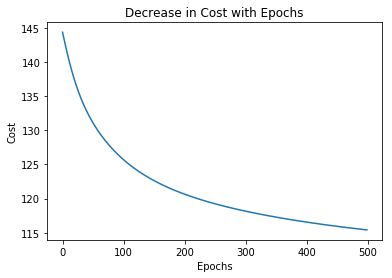

In [80]:
plt.plot(list(range(epochs)),cost_history)
plt.xlabel("Epochs")
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')
plt.show()

**Plot change of accuracy over the epochs**

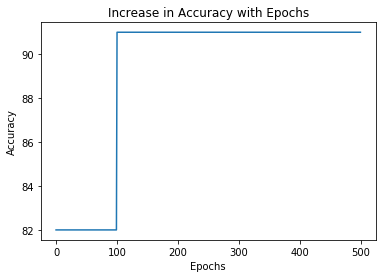

In [81]:
plt.plot(list(range(epochs)),accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
plt.show()

**可视化**

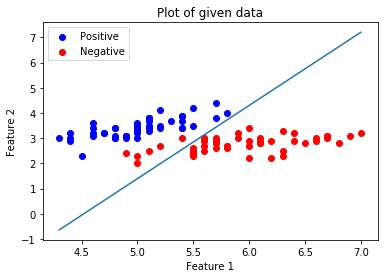

In [84]:
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:,0]),np.max(x_orig[:,0])])

decision_boundary_y = (-1.0/Weight[0])*(decision_boundary_x*Weight+Bias)

decision_boundary_y = [sum(decision_boundary_y[:,0]),sum(decision_boundary_y[:,1])]

#Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i]==1])

#Negative Data Points
x_negs = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i]==0])

# Ploting the Positive Data Points
plt.scatter(x_pos[:,0],x_pos[:,1],color='blue',label='Positive')

# Ploting the Negative Data Points
plt.scatter(x_neg[:,0],x_neg[:,1],color='red',label='Negative')

plt.plot(decision_boundary_x,decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()
plt.show()